In [38]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

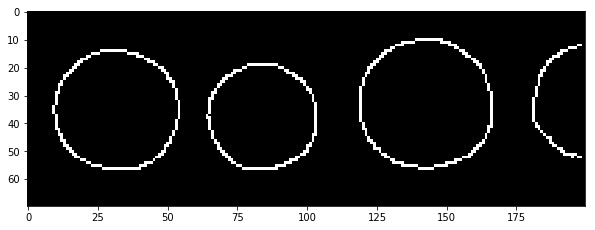

In [153]:
image = img_as_ubyte(data.coins()[160:230, 70:270])
edges = canny(image, sigma = 3, low_threshold=10, high_threshold = 50)


fig, ax = plt.subplots(1,1, figsize = (10,4))
ax.imshow(edges, cmap = 'gray')
plt.show()

In [185]:
hough_radii = np.arange(15,25,1)
hough_res = hough_circle(edges, hough_radii)
hough_res.shape

(10, 70, 200)

In [186]:
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks = 3)
radii

array([19, 23, 22])

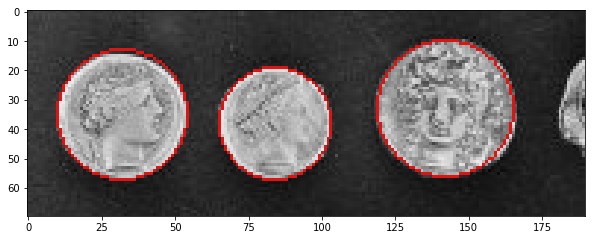

In [187]:
fig, ax = plt.subplots(1,1, figsize = (10,4))
image = img_as_ubyte(data.coins()[160:230, 70:260])
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    image[circy, circx] = (220,20,20)

ax.imshow(image, cmap = 'gray', interpolation = 'nearest')
plt.show()